___
# Tutorial NumPy
___

### CREATING ARRAYS

In [45]:
import numpy as np

# Crear un array 1D desde una lista
a = np.array([1, 2, 3])
print("1D array: \n a=\n", a)

# Crear un array 2D (matriz)
b = np.array([[1, 2, 3], [4, 5, 6]])
print("\n2D array:\n b=\n", b)

# Crear un array 3D
c = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print("\n3D array:\n c=\n", c)

# Verificar el número de dimensiones
print("\nDimensiones de a:", a.ndim)
print("Dimensiones de b:", b.ndim)
print("Dimensiones de c:", c.ndim)
print("Forma de c:", c.shape)

# Forzar número mínimo de dimensiones con ndmin
d = np.array([10, 20, 30], ndmin=4)
print("\nArray con ndmin=4:\n", d)
print("Forma:", d.shape)
print("Dimensiones:", d.ndim)

# Confirmar que es un objeto ndarray
print("\nTipo de objeto de a:", type(a))  # <class 'numpy.ndarray'>

# Ver forma (shape)
print("Forma de b (2D):", b.shape)


1D array: 
 a=
 [1 2 3]

2D array:
 b=
 [[1 2 3]
 [4 5 6]]

3D array:
 c=
 [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]

Dimensiones de a: 1
Dimensiones de b: 2
Dimensiones de c: 3
Forma de c: (2, 2, 2)

Array con ndmin=4:
 [[[[10 20 30]]]]
Forma: (1, 1, 1, 3)
Dimensiones: 4

Tipo de objeto de a: <class 'numpy.ndarray'>
Forma de b (2D): (2, 3)


### ARRAY INDEXING

In [46]:
# 1D Indexing
a = np.array([10, 20, 30, 40])
print(a[2])           # acceso directo
print(a[-1])          # último

# 2D Indexing
b = np.array([[1, 2, 3], [4, 5, 6]])
print(b[1, -1])       # última columna, segunda fila
b[0, 0] = 99

# 3D Indexing
c = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(c[1, 1, 1])     # bloque 1, fila 1, col 1

# Verificación rápida
print(a.shape, b.shape, c.shape)


30
40
6
8
(4,) (2, 3) (2, 2, 2)


### ARRAY SLICING

In [47]:
a = np.array([10, 20, 30, 40, 50, 60])

# Básico
print(a[1:4])      # [20 30 40]
print(a[:3])       # [10 20 30]
print(a[3:])       # [40 50 60]
print(a[-3:-1])    # [40 50]

# Con step
print(a[::2])      # [10 30 50]
print(a[1::2])     # [20 40 60]

# 2D slicing
b = np.array([[1,2,3,4],[5,6,7,8]])

print(b[:, 1:3])   # columnas 1 y 2, todas las filas
print(b[1, ::2])   # fila 1, columnas impares


[20 30 40]
[10 20 30]
[40 50 60]
[40 50]
[10 30 50]
[20 40 60]
[[2 3]
 [6 7]]
[5 7]


### DATA TYPES

In [48]:
# Inferencia automática de tipo
a = np.array([1, 2, 3])
print(a.dtype)  # int64 (o int32 según sistema)

# Crear con tipo específico
b = np.array([1.0, 2.0], dtype='float32')
c = np.array([1, 0, 1], dtype='bool')
d = np.array([1, 2, 3], dtype='complex')

# Conversión de tipo
e = a.astype('float64')
f = b.astype('int')

# Mostrar tipos
print(b.dtype, c.dtype, d.dtype)
print(e, e.dtype)
print(f, f.dtype)


int64
float32 bool complex128
[1. 2. 3.] float64
[1 2] int64


### COPY VS VIEW


In [ ]:
a = np.array([10, 20, 30])

# View (referencia a la misma memoria)
v = a.view()
v[0] = 999
print("a (view modifica):", a)  # [999 20 30]

# Copy (copia independiente)
c = a.copy()
c[1] = 777
print("a (copy NO modifica):", a)  # [999 20 30]
print("c:", c)                     # [999 777 30]

# Comprobación de relación, .base apunta al array original
print("view base is a?", v.base is a)  # True → vista
print("copy base is a?", c.base is a)  # False

#! Ejemplo de vista y copia de ¡indexing y slicing!
a = np.array([[10, 20, 30], [40, 50, 60]])

b = a[:, :2]         # vista
c = a[:, [0, 1]]     # copia

print("b owns data?", b.base is a)  # True → vista
print("c owns data?", c.base is a)  # False → copia


a (view modifica): [999  20  30]
a (copy NO modifica): [999  20  30]
c: [999 777  30]
view base is a? True
copy base is a? False
b owns data? True
c owns data? False


### ARRAY SHAPE

In [50]:
import numpy as np

arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

print(arr.shape) 

(2, 4)


### ARRAY RESHAPE

In [137]:
# Reshape básico: 1D a 2D
a = np.array([1, 2, 3, 4, 5, 6])
b = a.reshape((2, 3))   # 2 filas, 3 columnas
print("b=\n", b)

# Reshape a 3D: 1D → 2x1x3
c = a.reshape((2, 1, 3))
print("c=\n", c)

# Usar -1 para calcular dimensión automáticamente
d = a.reshape((3, -1))  # 3 filas, auto columnas
print("d=\n", d)

# Convertir d a filas
e = d.reshape(-1)
print("e=\n", e) 

# Verificar que no se copia (es una vista si es posible)
print("\nIs view?", d.base is a)





b=
 [[1 2 3]
 [4 5 6]]
c=
 [[[1 2 3]]

 [[4 5 6]]]
d=
 [[1 2]
 [3 4]
 [5 6]]
e=
 [1 2 3 4 5 6]

Is view? True


### ARRAY ITERATING

In [86]:
a = np.array([[1, 2, 3], 
              [4, 5, 6]])

# Iterar sobre filas (por defecto) y columnas
for row in a:
    print("Fila:", row)

# Para columnas
for col in a.T: # -> Entonces iteras por columnas como si fueran filas.
    print("Columna:", col)
# O bien
for j in range(a.shape[1]):  # número de columnas
    print(f"Columna {j}:", a[:, j])


# Iterar sobre cada elemento (nested loop)
for row in a:
    for val in row:
        print("Valor:", val)

# Mejor: iterar sobre todos los elementos directamente (1D view)
for val in np.nditer(a): # a.ravel() es lo mismo -> Recorre todos los elementos del array sin importar la forma o dimensión.
    print("Elemento:", val)

# Iterar con índice usando ndenumerate
for idx, val in np.ndenumerate(a): # Recorre todos los elementos, igual que nditer, pero además te da el índice en una tupla.
    print(f"Índice {idx} → Valor {val}")


Fila: [1 2 3]
Fila: [4 5 6]
Columna: [1 4]
Columna: [2 5]
Columna: [3 6]
Columna 0: [1 4]
Columna 1: [2 5]
Columna 2: [3 6]
Valor: 1
Valor: 2
Valor: 3
Valor: 4
Valor: 5
Valor: 6
Elemento: 1
Elemento: 2
Elemento: 3
Elemento: 4
Elemento: 5
Elemento: 6
Índice (0, 0) → Valor 1
Índice (0, 1) → Valor 2
Índice (0, 2) → Valor 3
Índice (1, 0) → Valor 4
Índice (1, 1) → Valor 5
Índice (1, 2) → Valor 6


### ARRAY JOIN

In [156]:
# Arrays base
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([[1, 2], [3, 4]])
d = np.array([[5, 6], [7, 8]])

#! Concatenar 1D
# 1. Concatenar 1D → 1D
print("Concatenate:\n", np.concatenate((a, b)))  # → [1 2 3 4 5 6]

# 2. Stack 1D con nueva dimensión
print("Stack axis=0:\n", np.stack((a, b), axis=0))  # shape (2, 3)
print("Stack axis=1:\n", np.stack((a, b), axis=1))  # shape (3, 2)

# 3. Vertical y horizontal stack
print("vstack:\n", np.vstack((a, b)))     # (2, 3)
print("hstack:\n", np.hstack((a, b)))       # (6,)

# 4. Column_stack: perfecto para arrays 1D
print("column_stack:\n", np.column_stack((a, b)))  # shape (3, 2)

#! Concatenar 2D
# 5. Concatenación 2D en distintos ejes
print("Concat eje 0:\n", np.concatenate((c, d), axis=0))  # stack filas
print("Concat eje 1:\n", np.concatenate((c, d), axis=1))  # stack columnas

#! Append y insert
a = np.array([1, 2, 3])

# Append: añade al final
print("Append:", np.append(a, 4))         # [1 2 3 4]
print("Append múltiple:", np.append(a, [5, 6]))  # [1 2 3 5 6]

# Insert: inserta en posición
print("Insert 99 en pos 1:", np.insert(a, 1, 99))      # [1 99 2 3]
print("Insert múltiple:", np.insert(a, [0, 2], [100, 200]))  # [100 1 2 200 3]

# En 2D
m = np.array([[1, 2], [3, 4]])
print("Append fila:\n", np.append(m, [[5, 6]], axis=0))
print("Insert columna:\n", np.insert(m, 1, [9, 9], axis=1))



Concatenate:
 [1 2 3 4 5 6]
Stack axis=0:
 [[1 2 3]
 [4 5 6]]
Stack axis=1:
 [[1 4]
 [2 5]
 [3 6]]
vstack:
 [[1 2 3]
 [4 5 6]]
hstack:
 [1 2 3 4 5 6]
column_stack:
 [[1 4]
 [2 5]
 [3 6]]
Concat eje 0:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
Concat eje 1:
 [[1 2 5 6]
 [3 4 7 8]]
Append: [1 2 3 4]
Append múltiple: [1 2 3 5 6]
Insert 99 en pos 1: [ 1 99  2  3]
Insert múltiple: [100   1   2 200   3]
Append fila:
 [[1 2]
 [3 4]
 [5 6]]
Insert columna:
 [[1 9 2]
 [3 9 4]]


### ARRAY SPLIT

In [88]:

#! -------- 1D SPLITTING --------
a = np.array([1, 2, 3, 4, 5, 6])

# Divide en 3 partes (iguales)
split_equal = np.array_split(a, 3)
print("Split 1D en 3 partes:")
for i, part in enumerate(split_equal):
    print(f"Parte {i+1}:", part)

# Divide en 4 partes (no iguales)
split_unequal = np.array_split(a, 4)
print("\nSplit 1D en 4 partes:")
for i, part in enumerate(split_unequal):
    print(f"Parte {i+1}:", part)

#! -------- 2D SPLITTING --------
b = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8]])

print("\nSplit 2D horizontal (columnas) con hsplit:")
hs = np.hsplit(b, 2)  # divide en 2 bloques de columnas
for i, col in enumerate(hs):
    print(f"Columna {i+1}:\n{col}")

print("\nSplit 2D vertical (filas) con vsplit:")
vs = np.vsplit(b, 2)  # divide en 2 bloques de filas
for i, row in enumerate(vs):
    print(f"Fila {i+1}:\n{row}")


Split 1D en 3 partes:
Parte 1: [1 2]
Parte 2: [3 4]
Parte 3: [5 6]

Split 1D en 4 partes:
Parte 1: [1 2]
Parte 2: [3 4]
Parte 3: [5]
Parte 4: [6]

Split 2D horizontal (columnas) con hsplit:
Columna 1:
[[1 2]
 [5 6]]
Columna 2:
[[3 4]
 [7 8]]

Split 2D vertical (filas) con vsplit:
Fila 1:
[[1 2 3 4]]
Fila 2:
[[5 6 7 8]]


### ARRAY SEARCH

In [152]:
a = np.array([1, 2, 3, 4, 5, 4, 4])

# 1. Buscar posiciones donde el valor es igual a 4
indices = np.where(a == 4)           #! np.where devuelve una tupla con los índices de cada dimensión
print("Índices donde a == 4:", indices[0])  # → [3 5 6]  
        
# 2. Buscar múltiplos de 2
even_indices = np.where(a % 2 == 0)
print("Índices de pares:", even_indices[0])  # → [1 3 5 6]

# 3. Buscar valores mayores que 3
greater = np.where(a > 3)
print("Mayores que 3:", greater[0])  # → [3 4 5 6]

# 6. Buscar primer índice de un valor (más controlado)
first_index = np.where(a == 4)[0]
print("Primer índice de 4:", first_index)  # → 3

Índices donde a == 4: [3 5 6]
Índices de pares: [1 3 5 6]
Mayores que 3: [3 4 5 6]
Primer índice de 4: [3 5 6]


### ARRAY SORT

In [132]:

#! Ordenar array 1D
a = np.array([3, 1, 2])
sorted_a = np.sort(a)
print("Ordenado (1D):", sorted_a)  # → [1 2 3]

# Ordenar array de strings
b = np.array(['banana', 'apple', 'cherry'])
print("Ordenado (strings):", np.sort(b))  # → ['apple' 'banana' 'cherry']

# Ordenar array booleano
c = np.array([True, False, True])
print("Ordenado (bool):", np.sort(c))  # → [False  True  True]

# !Array 2D
# Ordenar por filas y columnas
m = np.array([
    [9, 2, 7, 1],
    [5, 8, 6, 3],
    [4, 0, 2, 10]
])

print("🔹 Original:")
print(m)

# Ordenar por filas (axis=1)
sorted_by_row = np.sort(m, axis=1)
print("\n🔹 Ordenado por filas (axis=1):")
print(sorted_by_row)

# Ordenar por columnas (axis=0)
sorted_by_col = np.sort(m, axis=0)
print("\n🔹 Ordenado por columnas (axis=0):")
print(sorted_by_col)

Ordenado (1D): [1 2 3]
Ordenado (strings): ['apple' 'banana' 'cherry']
Ordenado (bool): [False  True  True]
🔹 Original:
[[ 9  2  7  1]
 [ 5  8  6  3]
 [ 4  0  2 10]]

🔹 Ordenado por filas (axis=1):
[[ 1  2  7  9]
 [ 3  5  6  8]
 [ 0  2  4 10]]

🔹 Ordenado por columnas (axis=0):
[[ 4  0  2  1]
 [ 5  2  6  3]
 [ 9  8  7 10]]


### ARRAY FILTER

In [153]:

# Array base
arr = np.array([10, 15, 20, 25, 30])

# 1. Filtro con máscara booleana manual
mask = [True, False, True, False, True]
print("Filtro manual:", arr[mask])  # [10 20 30]

# 2. Filtro con condición (más útil)
filtered = arr[arr > 20]
print("Valores > 20:", filtered)    # [25 30]

# 3. Condiciones múltiples con operadores lógicos
filtered_multi = arr[(arr > 10) & (arr < 30)]
print("Entre 10 y 30:", filtered_multi)  # [15 20 25]

# 4. Filtro en matriz 2D
mat = np.array([[1, 2, 3],
                [4, 5, 6]])

print("Matriz > 3:", mat[mat > 3])  # [4 5 6]


Filtro manual: [10 20 30]
Valores > 20: [25 30]
Entre 10 y 30: [15 20 25]
Matriz > 3: [4 5 6]


___

In [1]:
import numpy as np

# Crear una matriz 3x3 de unos
x = np.ones((3, 3))
print(x, "\n")  

# Agregar una cuarta columna de unos (nueva columna a la derecha)
x = np.hstack((x, np.ones((3, 1))))
print(x, "\n")

# Agregar una quinta columna de unos (otra columna a la derecha)
x = np.hstack((x, np.ones((3, 1))))
print(x, "\n")

# Agregar una nueva fila de unos (nueva fila en la parte inferior)
x = np.vstack((x, np.ones((1, x.shape[1]))))
print(x, "\n")

# Mostrar el tamaño final de la matriz
print(x.shape)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 

(4, 5)


In [149]:

#! Test
a = np.array([
    [9, 2, 7, 1],
    [5, 8, 6, 3],
    [4, 0, 2, 10]
])
# Aplanar el array
a_flat = a.reshape(-1) # = a.flatten()
a_flat_sorted = np.sort(a_flat)

a_sorted = a_flat_sorted.reshape(a.shape)
print(a_sorted)


[[ 0  1  2  2]
 [ 3  4  5  6]
 [ 7  8  9 10]]


In [ ]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])

y = x[:, [0, 1]]  # indexación (copia)

y[0, 0] = 999

print("x:\n", x)
print("y:\n", y)


x:
 [[99.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
y:
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [21]:
A = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])
x = np.eye(3)  # Crear una matriz columna de unos
# Multiplicar matrices
result = A @ x

print(result)


[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


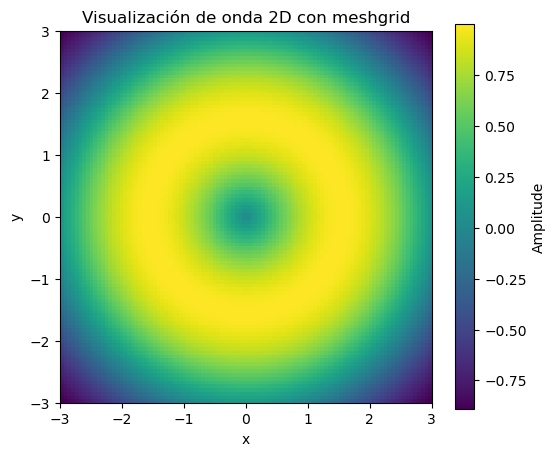

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Crear vectores base
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

# Crear la malla con meshgrid (forma tradicional)
X, Y = np.meshgrid(x, y)  # X, Y ambos con shape (100, 100)

# Calcular la función de onda
Z = np.sin(np.sqrt(X**2 + Y**2))  # onda circular radial

# Graficar con imshow
plt.figure(figsize=(6, 5))
plt.imshow(Z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title('Visualización de onda 2D con meshgrid')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(False)
plt.show()


In [ ]:

#! TEST
a = np.array([1, 2, 3, 4, 5, 4, 4])
a == 4
print(a)

truncado = np.zeros(np.where(a == 4)[0].shape[0], dtype=int)
print("truncado es ", truncado)

for i, idx in enumerate(np.where(a == 4)[0]):
    truncado[i] = a[idx]
    print("truncado es ", truncado)
    
# Alternativa más sencilla
print("\n\n")
truncado = a[a == 4]
print("truncado es ", truncado)
    

[1 2 3 4 5 4 4]
truncado es  [0 0 0]
truncado es  [4 0 0]
truncado es  [4 4 0]
truncado es  [4 4 4]



truncado es  [4 4 4]
